# Dataset Visualization

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mbarbetti/lymphoma-classification/blob/master/1_dataset_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mbarbetti/lymphoma-classification/blob/master/1_dataset_visualization.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

data_dir  = "./data"
data_file = "db_mediastinalbulky_cleaned.pkl"
file_path = os.path.join ( data_dir, data_file )

with open (file_path, "rb") as file:
  data = pickle.load (file)

## Radiomic Features

### Intensity-based Features

Intensity $I$ might be SUV for PET or HU (Hounsfield Units) for CT.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/intensity-based-previously-conventional-indices)

#### Intensity-based $Q_1$
The first quartile ($Q_1$) marks where 25% of the data is below or to the left of it.

**Label:** `CONVENTIONAL_SUVbwQ1`

#### Intensity-based $Q_2$ 
The second quartile ($Q_2$) marks where 50% of the data is below or to the left of it.

**Label:** `CONVENTIONAL_SUVbwQ2`

#### Intensity-based $Q_3$ 
The third quartile ($Q_3$) marks where 75% of the data is below or to the left of it.

**Label:** `CONVENTIONAL_SUVbwQ3`

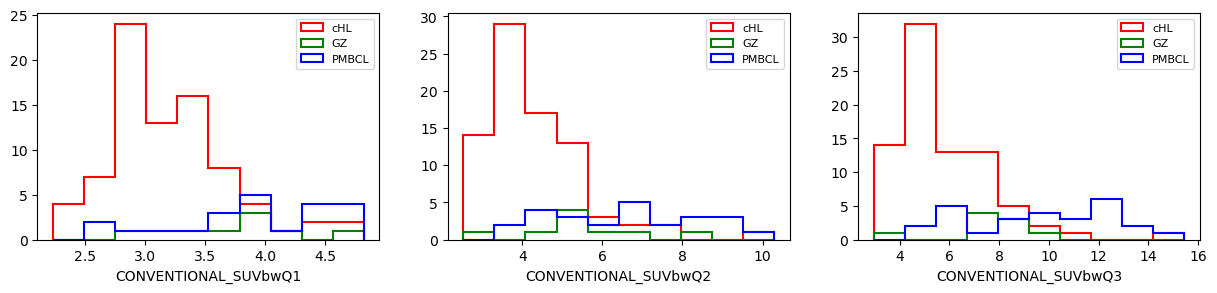

In [2]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["CONVENTIONAL_SUVbwQ1", "CONVENTIONAL_SUVbwQ2", "CONVENTIONAL_SUVbwQ3"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### Intensity-based min 
Reflects the minimum intensity value in the VOI.

$intensity\_based\_min = \min_i I_i$

**Label:** `CONVENTIONAL_SUVbwmin`

#### Intensity-based max
Reflects the maximum intensity value in the VOI.

$intensity\_based\_max = \max_i I_i$

**Label:** `CONVENTIONAL_SUVbwmax`

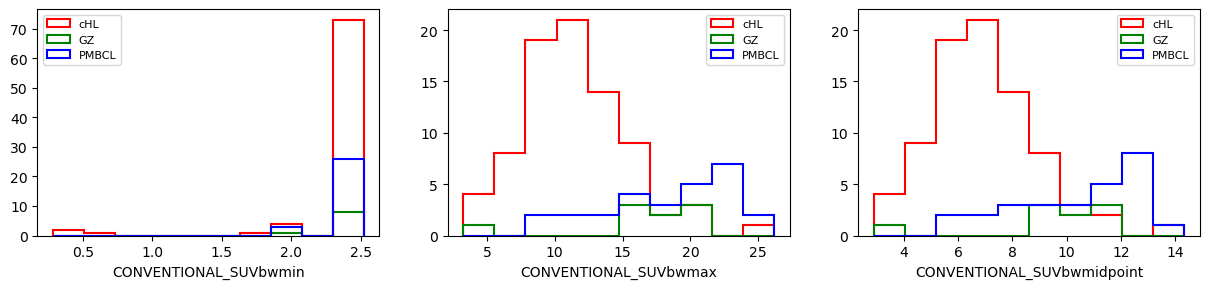

In [3]:
## new feature
data["CONVENTIONAL_SUVbwmidpoint"] = 0.5 * (data["CONVENTIONAL_SUVbwmax"] + data["CONVENTIONAL_SUVbwmin"])

fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["CONVENTIONAL_SUVbwmin", "CONVENTIONAL_SUVbwmax", "CONVENTIONAL_SUVbwmidpoint"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper left" if (i == 0) else "upper right"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

#### Intensity-based mean
Reflects the average intensity value in the VOI.

$intensity\_based\_mean = \frac{1}{N} \sum_i I_i$

**Label:** `CONVENTIONAL_SUVbwmean`

#### Intensity-based standard deviation
Reflects the variance of intensity values in the VOI.

$intensity\_based\_std = \sqrt{ \frac{\sum_i (I_i - \bar{I})^2}{N} }$

**Label:** `CONVENTIONAL_SUVbwstd`

#### Intensity-based TLG
Is the total signal (Total Lesion Glycolysis in FDG PET) defined as the product of $I_{mean}$ by $V$ in mL [[LARSON 1999](https://pubmed.ncbi.nlm.nih.gov/14516540/)].

$local\_intensity\_based\_mean = V \cdot \frac{1}{N} \sum_i I_i$

**Label:** `CONVENTIONAL_TLG(mL)[onlyForPETorNM]`

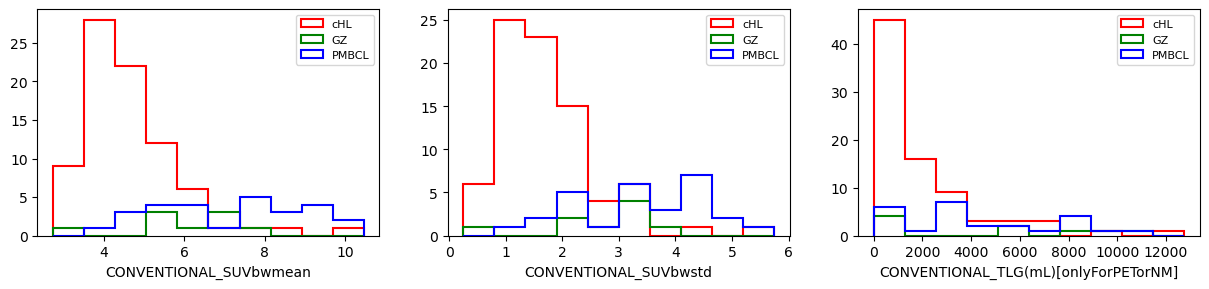

In [4]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["CONVENTIONAL_SUVbwmean", "CONVENTIONAL_SUVbwstd", "CONVENTIONAL_TLG(mL)[onlyForPETorNM]"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### Local intensity-based peak
Reflects the mean intensity value in a sphere with a volume of \~0.5 or \~1 mL and located so that the average intensity value in the VOI is maximum.

**Labels:** [ `CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought` , `CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)` , `CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought` , `CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)` ]

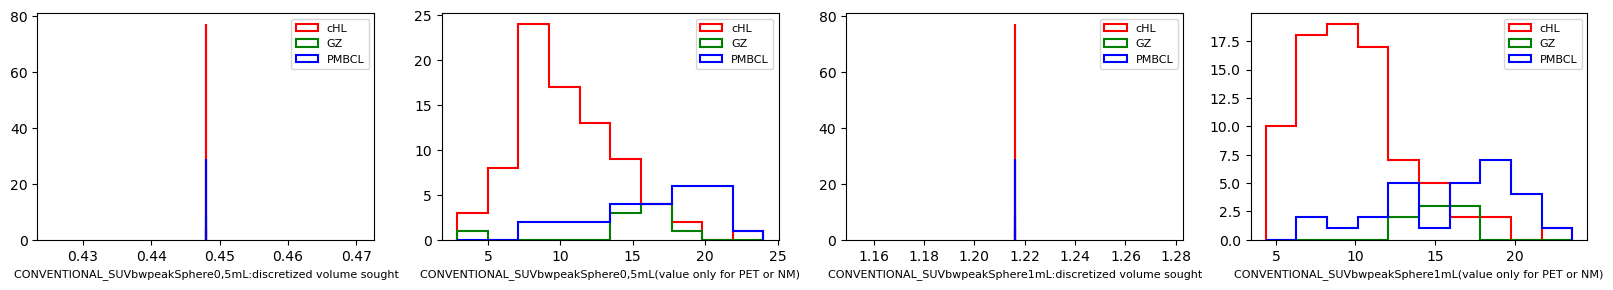

In [5]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)

for i, label in enumerate (["CONVENTIONAL_SUVbwpeakSphere0,5mL:discretized volume sought", "CONVENTIONAL_SUVbwpeakSphere0,5mL(value only for PET or NM)", 
                            "CONVENTIONAL_SUVbwpeakSphere1mL:discretized volume sought", "CONVENTIONAL_SUVbwpeakSphere1mL(value only for PET or NM)"]):
  ax[i].set_xlabel ( label, fontsize = 8 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### Intensity-based Skewness
Is the asymmetry of the grey-level distribution.

$intensity\_based\_skewness = \frac{\frac{1}{N} \sum_i (I_i - \bar{I})^3}{\left (\sqrt{\frac{1}{N} \sum_i (I_i - \bar{I})^2} \right)^3}$

**Label:** `CONVENTIONAL_SUVbwSkewness`

#### Intensity-based Kurtosis 
Reflects the shape of the grey-level distribution (peaked or flat) relative to a normal distribution.

$intensity\_based\_kurtosis = \frac{\frac{1}{N} \sum_i (I_i - \bar{I})^4}{\left (\frac{1}{N} \sum_i (I_i - \bar{I})^2 \right)^2}$

**Labels:** [ `CONVENTIONAL_SUVbwKurtosis` , `CONVENTIONAL_SUVbwExcessKurtosis` ]

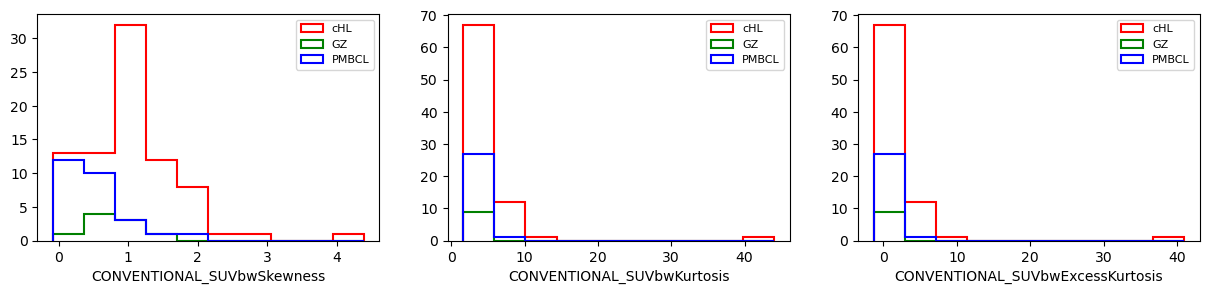

In [6]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["CONVENTIONAL_SUVbwSkewness", "CONVENTIONAL_SUVbwKurtosis", "CONVENTIONAL_SUVbwExcessKurtosis"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

### Intensity Histogram Features

Intensity $I$ might be SUV for PET or HU (Hounsfield Units) for CT.

**Note:** To build discretized values, it is necessary to determine a _bin width_. The indices derived from these indices will _depend_ on this bin width parameter.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/intensity-histogram-previously-discretized-indices)

#### Intensity histogram $Q_1$
The first quartile ($Q_1$) marks where 25% of the data is below or to the left of it.

**Label:** `DISCRETIZED_SUVbwQ1`

#### Intensity histogram $Q_2$ 
The second quartile ($Q_2$) marks where 50% of the data is below or to the left of it.

**Label:** `DISCRETIZED_SUVbwQ2`

#### Intensity histogram $Q_3$ 
The third quartile ($Q_3$) marks where 75% of the data is below or to the left of it.

**Label:** `DISCRETIZED_SUVbwQ3`

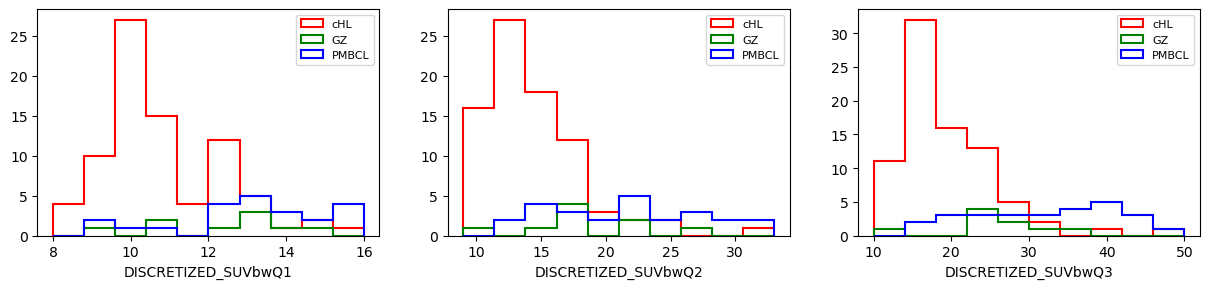

In [7]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["DISCRETIZED_SUVbwQ1", "DISCRETIZED_SUVbwQ2", "DISCRETIZED_SUVbwQ3"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### Intensity histogram max
Reflects the maximum intensity value in the VOI.

$intensity\_based\_max = \max_i I_i$

**Label:** `DISCRETIZED_SUVbwmax`

#### Intensity histogram mean
Reflects the average intensity value in the VOI.

$intensity\_based\_mean = \frac{1}{N} \sum_i I_i$

**Label:** `DISCRETIZED_SUVbwmean`

#### Intensity histogram standard deviation
Reflects the variance of intensity values in the VOI.

$intensity\_based\_std = \sqrt{ \frac{\sum_i (I_i - \bar{I})^2}{N} }$

**Label:** `DISCRETIZED_SUVbwstd`

#### Intensity histogram TLG
Is the total signal (Total Lesion Glycolysis in FDG PET) defined as the product of $I_{mean}$ by $V$ in mL [[LARSON 1999](https://pubmed.ncbi.nlm.nih.gov/14516540/)].

$local\_intensity\_based\_mean = V \cdot \frac{1}{N} \sum_i I_i$

**Label:** `DISCRETIZED_TLG(mL)[onlyForPETorNM]`

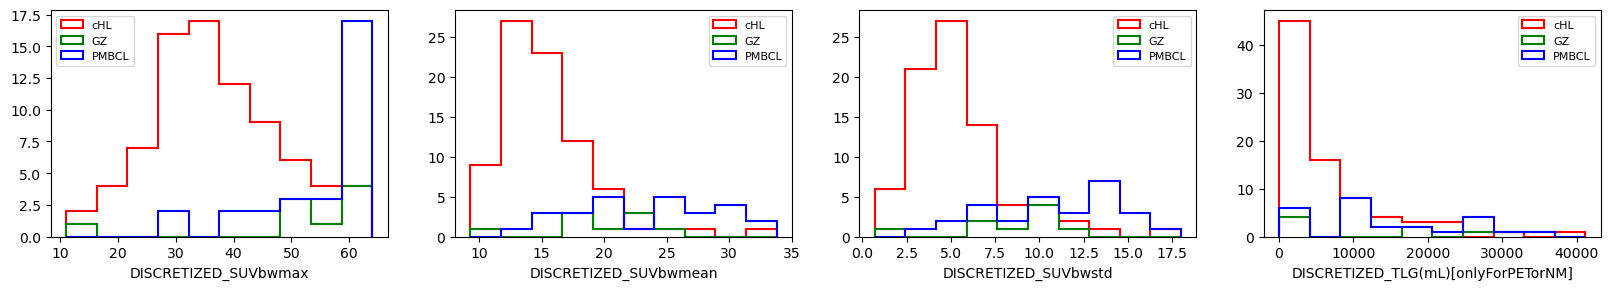

In [8]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)

for i, label in enumerate (["DISCRETIZED_SUVbwmax", "DISCRETIZED_SUVbwmean", "DISCRETIZED_SUVbwstd", "DISCRETIZED_TLG(mL)[onlyForPETorNM]"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper left" if (i == 0) else "upper right"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

#### Local intensity histogram peak
Reflects the mean intensity value in a sphere with a volume of \~0.5 or \~1 mL and located so that the average intensity value in the VOI is maximum.

**Labels:** [ `DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought` , `DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)` , `DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought` , `DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)` ]

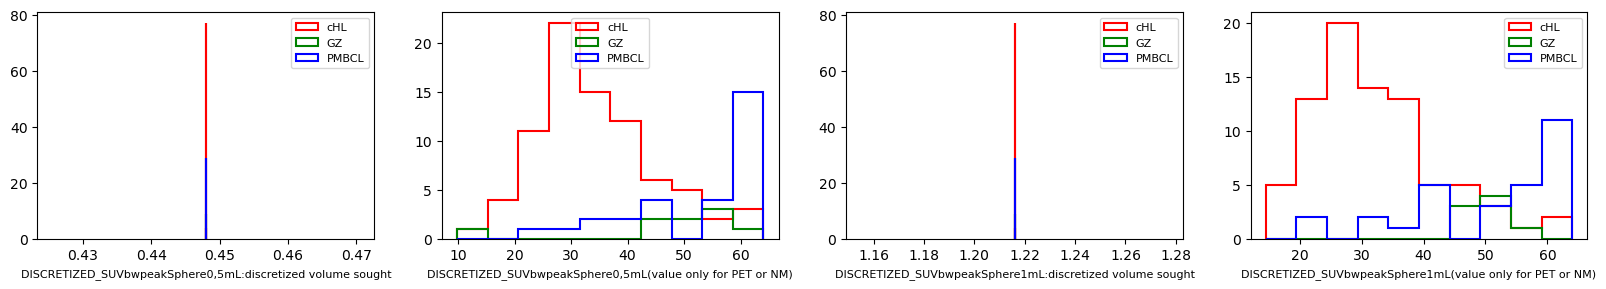

In [9]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)

for i, label in enumerate (["DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought", "DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)", 
                            "DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought", "DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)"]):
  ax[i].set_xlabel ( label, fontsize = 8 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper right" if (i != 1) else "upper center"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

#### Intensity histogram Skewness
Is the asymmetry of the grey-level distribution.

$intensity\_based\_skewness = \frac{\frac{1}{N} \sum_i (I_i - \bar{I})^3}{\left (\sqrt{\frac{1}{N} \sum_i (I_i - \bar{I})^2} \right)^3}$

**Label:** `DISCRETIZED_SUVbwSkewness`

#### Intensity histogram Kurtosis 
Reflects the shape of the grey-level distribution (peaked or flat) relative to a normal distribution.

$intensity\_based\_kurtosis = \frac{\frac{1}{N} \sum_i (I_i - \bar{I})^4}{\left (\frac{1}{N} \sum_i (I_i - \bar{I})^2 \right)^2}$

**Labels:** [ `DISCRETIZED_SUVbwKurtosis` , `DISCRETIZED_SUVbwExcessKurtosis` ]

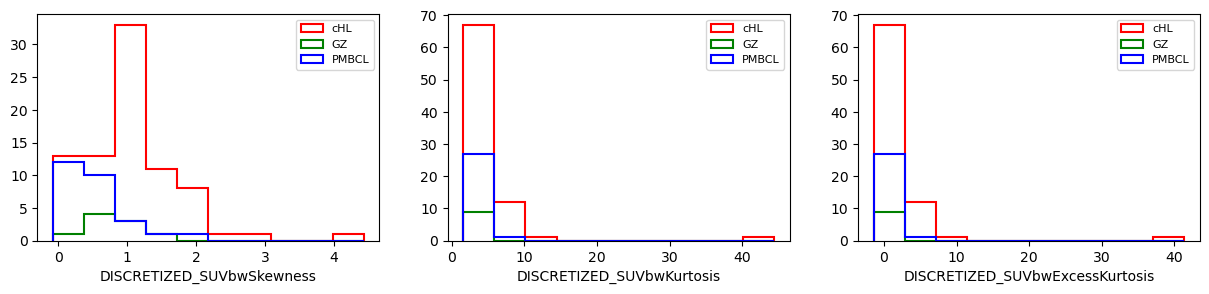

In [10]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["DISCRETIZED_SUVbwSkewness", "DISCRETIZED_SUVbwKurtosis", "DISCRETIZED_SUVbwExcessKurtosis"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

### Intensity-based and histogram comparison

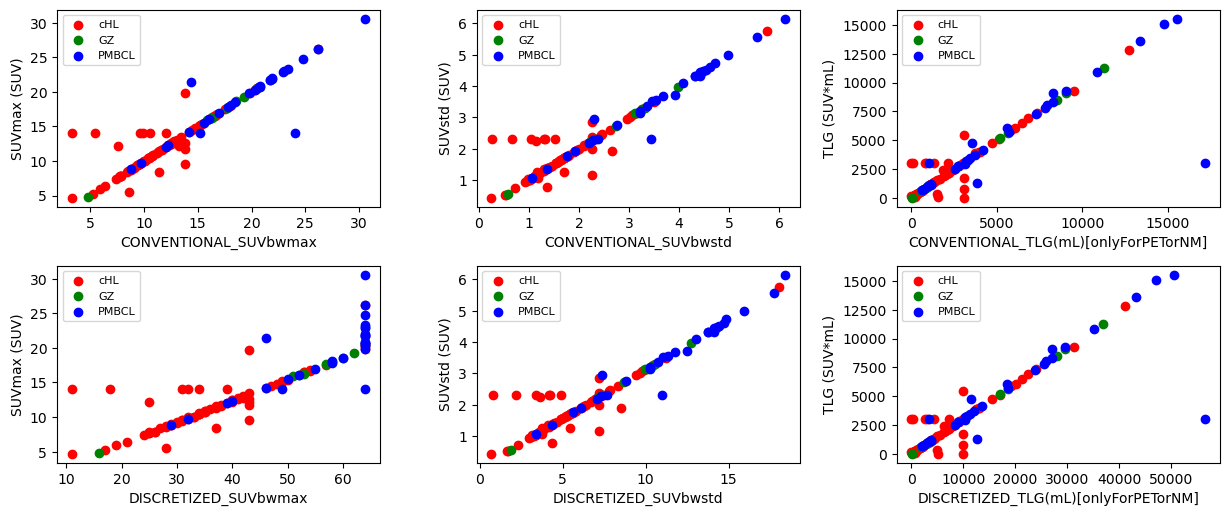

In [11]:
fig, ax = plt.subplots (nrows = 2, ncols = 3, figsize = (15,6), dpi = 100)
plt.subplots_adjust (wspace = 0.3, hspace = 0.3)

i, j = (0,0) 
for xlabel in ["CONVENTIONAL_SUVbwmax", "CONVENTIONAL_SUVbwstd", "CONVENTIONAL_TLG(mL)[onlyForPETorNM]",
               "DISCRETIZED_SUVbwmax", "DISCRETIZED_SUVbwstd", "DISCRETIZED_TLG(mL)[onlyForPETorNM]"]:
  if (j == 0):
    ylabel = "SUVmax (SUV)" 
  elif (j == 1):
    ylabel = "SUVstd (SUV)"
  elif (j == 2):
    ylabel = "TLG (SUV*mL)"
  else:
    ylabel = "SUVmax (SUV)" 
    i = 1 ; j = 0
  ax[i,j].set_xlabel ( xlabel, fontsize = 10 )
  ax[i,j].set_ylabel ( ylabel, fontsize = 10 )
  ax[i,j].scatter ( data.query("lymphoma_type==1")[xlabel], data.query("lymphoma_type==1")[ylabel], color = "r", label = "cHL"   )
  ax[i,j].scatter ( data.query("lymphoma_type==2")[xlabel], data.query("lymphoma_type==2")[ylabel], color = "g", label = "GZ"    )
  ax[i,j].scatter ( data.query("lymphoma_type==3")[xlabel], data.query("lymphoma_type==3")[ylabel], color = "b", label = "PMBCL" )
  ax[i,j].legend ( loc = "upper left", fontsize = 8 )
  j += 1

plt.show()

**Result:** `DISCRETIZED_*` variables dropped in favor of the `CONVENTIONAL_*` ones. 

The dropping strategy relies on the unexpected behavior of the `DISCRETIZED_SUVbwmax` variable probably due to some issues with the bin width chosen for the histogram-based intensity variable

In [12]:
feats_to_drop = [
  "SUVmin (SUV)", "SUVmean (SUV)", "SUVstd (SUV)", "SUVmax (SUV)", "MTV (# vx)", "MTV (mL)", "SMTV (mL/Kg)", 
  "TLG (SUV*mL)", "STLG (SUV*mL/Kg)", "MTV (# vx) TOT", "MTV (mL) TOT", "SMTV (mL/Kg) TOT", "TLG (SUV*mL) TOT", 
  "STLG (SUV*mL/Kg) TOT", "CONVENTIONAL_SUVbwmin", "CONVENTIONAL_SUVbwmidpoint", "CONVENTIONAL_SUVbwExcessKurtosis", 
  "DISCRETIZED_SUVbwmean", "DISCRETIZED_SUVbwstd", "DISCRETIZED_SUVbwmax", "DISCRETIZED_SUVbwQ1", "DISCRETIZED_SUVbwQ2", 
  "DISCRETIZED_SUVbwQ3", "DISCRETIZED_SUVbwSkewness", "DISCRETIZED_SUVbwKurtosis", "DISCRETIZED_SUVbwExcessKurtosis", 
  "DISCRETIZED_SUVbwpeakSphere0,5mL:discretized volume sought", "DISCRETIZED_SUVbwpeakSphere0,5mL(value only for PET or NM)", 
  "DISCRETIZED_SUVbwpeakSphere1mL:discretized volume sought", "DISCRETIZED_SUVbwpeakSphere1mL(value only for PET or NM)", 
  "DISCRETIZED_TLG(mL)[onlyForPETorNM]"
]

redu_data = data . copy()
redu_data . drop ( labels = feats_to_drop, axis = 1, inplace = True )

# Texture Features - First Order Features

### Discretized Histogram Features

**Note:** To build discretized values, it is necessary to determine a _bin width_. The indices derived from these indices will _depend_ on this bin width parameter.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/discretized-histo-first-order-features)

#### Discretized Histogram Entropy
Reflects the randomness of the distribution.

$discretized\_histo\_entropy_{log10} = - \sum_i p_i \cdot \log_{10} (p_i + \varepsilon)$

$discretized\_histo\_entropy_{log2} = - \sum_i p_i \cdot \log_{2} (p_i + \varepsilon)$

where $p_i$ is the probability of occurrence of voxels with intensity $i$ and $\varepsilon = 2 \times 10^{-16}$.

**Labels:** [ `DISCRETIZED_HISTO_Entropy_log10` , `DISCRETIZED_HISTO_Entropy_log2` ]

#### Discretized Histogram Energy
Reflects the uniformity of the distribution.

$discretized\_histo\_energy = \sum_i p_i^2$

where $p_i$ is the probability of occurrence of voxels with intensity $i$.

**Label:** `DISCRETIZED_HISTO_Energy[=Uniformity]`

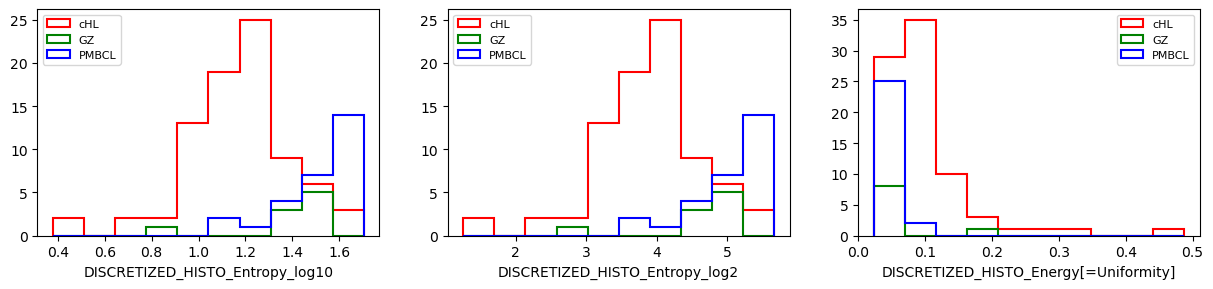

In [13]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["DISCRETIZED_HISTO_Entropy_log10", "DISCRETIZED_HISTO_Entropy_log2", "DISCRETIZED_HISTO_Energy[=Uniformity]"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper left" if (i != 2) else "upper right"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

### Shape Features

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/shape-features)

#### Shape Sphericity
Is how spherical a Volume of Interest is. Sphericity is equal to 1 for a perfect sphere.

$shape\_sphericity = \frac{\pi^{1/3} \cdot (6V)^{2/3}}{A}$

where $V$ and $A$ correspond to the volume and the surface of the Volume Of Interest based on the Delaunay triangulation.

**Label:** `SHAPE_Sphericity[onlyFor3DROI])`

#### Shape Compacity
Reflects how compact the Volume of Interest is.

$shape\_compacity = \frac{A^{3/2}}{V}$

where $V$ and $A$ correspond to the volume and the surface of the Volume Of Interest based on the Delaunay triangulation.

**Label:** `SHAPE_Compacity[onlyFor3DROI]`

#### Shape Volume
Is the Volume of Interest in mL and in voxels.

$shape\_volume = \sum_i V_i$

where $V_i$ correspond to the volume of voxel $i$ of the VOI.

**Labels:** [ `SHAPE_Volume(mL)` , `SHAPE_Volume(vx)` ]

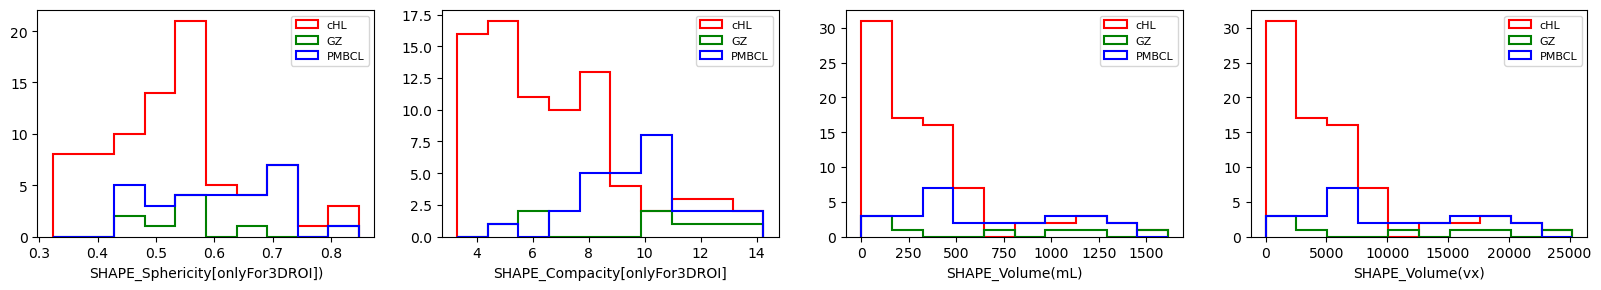

In [14]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)

for i, label in enumerate (["SHAPE_Sphericity[onlyFor3DROI])", "SHAPE_Compacity[onlyFor3DROI]", 
                            "SHAPE_Volume(mL)", "SHAPE_Volume(vx)"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

### Intensity-based and histogram comparison

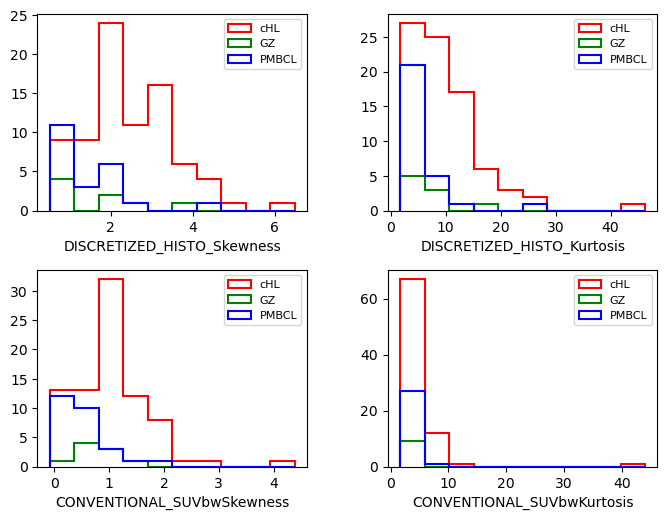

In [15]:
fig, ax = plt.subplots (nrows = 2, ncols = 2, figsize = (8,6), dpi = 100)
plt.subplots_adjust (wspace = 0.3, hspace = 0.3)

i, j = (0,0)
for label in ["DISCRETIZED_HISTO_Skewness", "DISCRETIZED_HISTO_Kurtosis", "CONVENTIONAL_SUVbwSkewness", "CONVENTIONAL_SUVbwKurtosis"]:
  if (j == 2): i = 1 ; j = 0
  ax[i,j].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i,j].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i,j].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i,j].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i,j].legend ( loc = "upper right", fontsize = 8 )
  j += 1

plt.show()

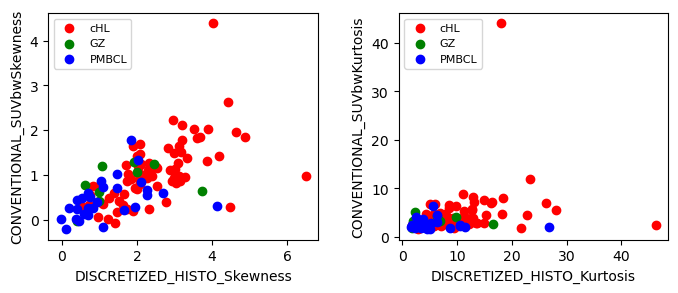

In [16]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)
plt.subplots_adjust (wspace = 0.3)

for i, (ylabel, xlabel) in enumerate ( zip(["CONVENTIONAL_SUVbwSkewness", "CONVENTIONAL_SUVbwKurtosis"],
                                           ["DISCRETIZED_HISTO_Skewness", "DISCRETIZED_HISTO_Kurtosis"]) ):
  ax[i].set_xlabel ( xlabel, fontsize = 10 )
  ax[i].set_ylabel ( ylabel, fontsize = 10 )
  ax[i].scatter ( data.query("lymphoma_type==1")[xlabel], data.query("lymphoma_type==1")[ylabel], color = "r", label = "cHL"   )
  ax[i].scatter ( data.query("lymphoma_type==2")[xlabel], data.query("lymphoma_type==2")[ylabel], color = "g", label = "GZ"    )
  ax[i].scatter ( data.query("lymphoma_type==3")[xlabel], data.query("lymphoma_type==3")[ylabel], color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper left", fontsize = 8 )

plt.show()

In [17]:
feats_to_drop = [
  "DISCRETIZED_HISTO_Entropy_log2", "SHAPE_Volume(vx)", "DISCRETIZED_HISTO_Skewness", 
  "DISCRETIZED_HISTO_Kurtosis", "DISCRETIZED_HISTO_ExcessKurtosis"
]

redu_data . drop ( labels = feats_to_drop, axis = 1, inplace = True )

# Texture Features - Second Order Features

### Grey-Level Zone Length Matrix (GLZLM)

The grey-level zone length matrix (GLZLM) provides information on the size of homogeneous zones for each grey-level in 3 dimensions. It is also named Grey Level Size Zone Matrix (GLSZM). From this matrix, 11 texture indices can be computed. Element $(i,j)$ of GLZLM corresponds to the number of homogeneous zones of $j$ voxels with the intensity $i$ in an image and is called $GLZLM(i,j)$ thereafter.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/grey-level-zone-length-matrix-glzlm)

#### GLZLM_SZE, GLZLM_LZE
Short-Zone Emphasis or Long-Zone Emphasis is the distribution of the short or the long homogeneous zones in an image.

$GLZLM\_SZE = \frac{1}{H} \sum_i \sum_j \frac{GLZLM(i,j)}{j^2}$

$GLZLM\_LZE = \frac{1}{H} \sum_i \sum_j GLZLM(i,j) \cdot j^2$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLZLM_SZE` , `GLZLM_LZE` ]

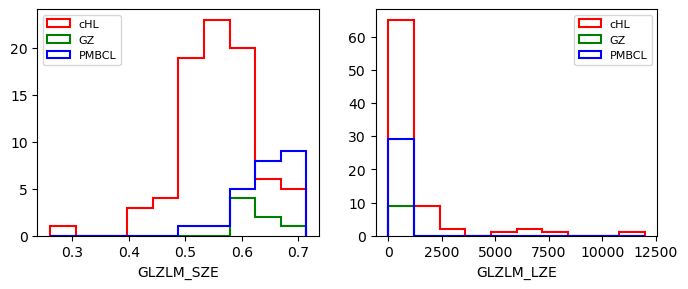

In [18]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLZLM_SZE", "GLZLM_LZE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper left" if (i == 0) else "upper right"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

#### GLZLM_LGZE, GLZLM_HGZE
Low Gray-level Zone Emphasis or High Gray-level Zone Emphasis is the distribution of the low or high grey-level zones.

$GLZLM\_LGZE = \frac{1}{H} \sum_i \sum_j \frac{GLZLM(i,j)}{i^2}$

$GLZLM\_HGZE = \frac{1}{H} \sum_i \sum_j GLZLM(i,j) \cdot i^2$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLZLM_LGZE` , `GLZLM_HGZE` ]

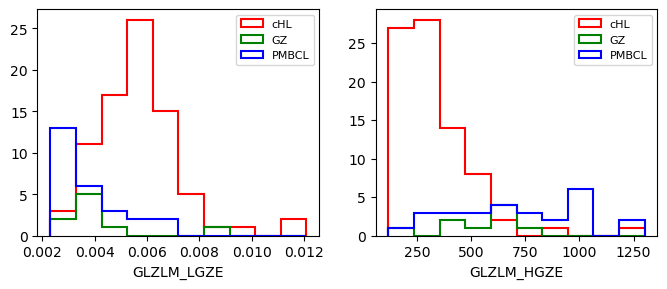

In [19]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLZLM_LGZE", "GLZLM_HGZE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLZLM_SZLGE, GLZLM_SZHGE
Short-Zone Low Gray-level Emphasis or Short-Zone High Gray-level Emphasis is the distribution of the short homogeneous zones with low or high grey-levels.

$GLZLM\_SZLGE = \frac{1}{H} \sum_i \sum_j \frac{GLZLM(i,j)}{i^2 \cdot j^2}$

$GLZLM\_SZHGE = \frac{1}{H} \sum_i \sum_j \frac{GLZLM(i,j) \cdot i^2}{j^2}$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLZLM_SZLGE` , `GLZLM_SZHGE` ]

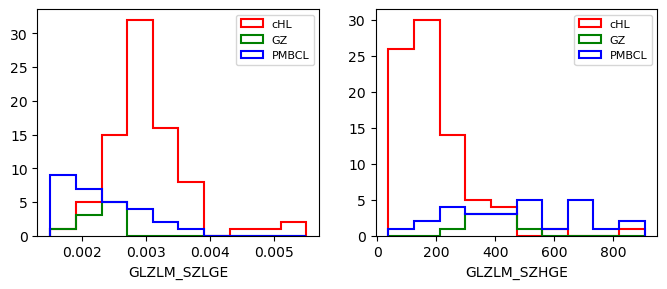

In [20]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLZLM_SZLGE", "GLZLM_SZHGE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLZLM_LZLGE, GLZLM_LZHGE
Long-Zone Low Gray-level Emphasis or Long-Zone High Gray-level Emphasis is the distribution of the long homogeneous zones with low or high grey-levels.

$GLZLM\_LZLGE = \frac{1}{H} \sum_i \sum_j \frac{GLZLM(i,j) \cdot j^2}{i^2}$

$GLZLM\_LZHGE = \frac{1}{H} \sum_i \sum_j GLZLM(i,j) \cdot i^2 \cdot j^2$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLZLM_LZLGE` , `GLZLM_LZHGE` ]

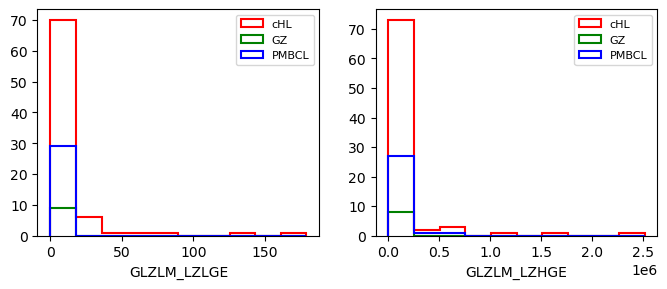

In [21]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLZLM_LZLGE", "GLZLM_LZHGE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLZLM_GLNUz, GLZLM_ZLNU
Gray-Level Non-Uniformity for zone or Zone Length Non-Uniformity is the non-uniformity of the grey-levels or the length of the homogeneous zones.

$GLZLM\_GLNUz = \frac{1}{H} \sum_i \left ( \sum_j GLZLM(i,j) \right )^2$

$GLZLM\_ZLNU = \frac{1}{H} \sum_j \left ( \sum_i GLZLM(i,j) \right )^2$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLZLM_GLNU` , `GLZLM_ZLNU` ]

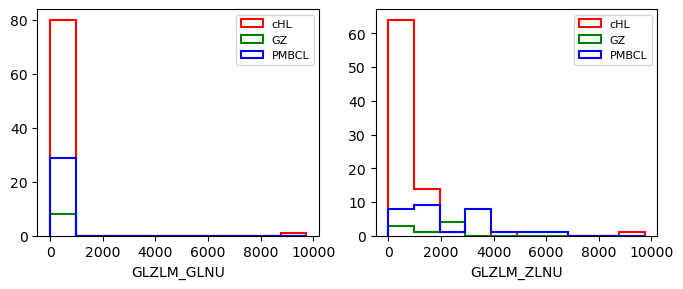

In [22]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLZLM_GLNU", "GLZLM_ZLNU"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLZLM_ZP
Zone Percentage measures the homogeneity of the homogeneous zones.

$GLZLM\_ZP = \frac{H}{ \sum_i \sum_j \left ( j \cdot GLZLM(i,j) \right ) }$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Label:** `GLZLM_ZP`

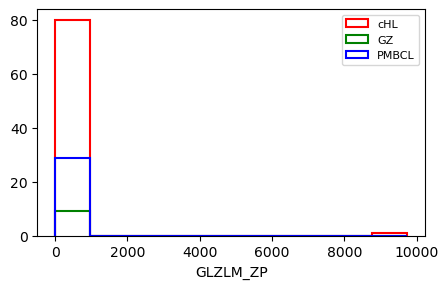

In [23]:
plt.figure (figsize = (5,3), dpi = 100)
plt.xlabel ( "GLZLM_ZP", fontsize = 10 )
h_1, bins, _ = plt.hist ( data.query("lymphoma_type==1")["GLZLM_ZP"], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
h_2, bins, _ = plt.hist ( data.query("lymphoma_type==2")["GLZLM_ZP"], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
h_3, bins, _ = plt.hist ( data.query("lymphoma_type==3")["GLZLM_ZP"], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
plt.legend ( loc = "upper right", fontsize = 8 )

plt.show()

### Grey-Level Run Length Matrix (GLRLM)

The grey-level run length matrix (GLRLM) gives the size of homogeneous runs for each grey level. This matrix is computed for the 13 different directions in 3D (4 in 2D) and for each of the 11 texture indices derived from this matrix, the 3D value is the average over the 13 directions in 3D (4 in 2D). The element $(i,j)$ of GLRLM corresponds to the number of homogeneous runs of $j$ voxels with intensity $i$ in an image and is called $GLRLM(i,j)$ thereafter.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/grey-level-run-length-matrix-glrlm)

#### GLRLM_SRE, GLRLM_LRE
Short-Run Emphasis or Long-Run Emphasis is the distribution of the short or the long homogeneous runs in an image.

$GLRLM\_SRE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j \frac{GLRLM(i,j)}{j^2} \right )$

$GLRLM\_LRE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j GLRLM(i,j) \cdot j^2 \right )$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLRLM_SRE` , `GLRLM_LRE` ]

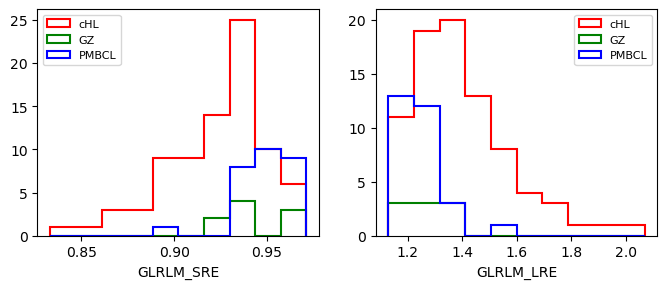

In [24]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLRLM_SRE", "GLRLM_LRE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper left" if (i == 0) else "upper right"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

#### GLRLM_LGRE, GLRLM_HGRE
Low Gray-level Run Emphasis or High Gray-level Run Emphasis is the distribution of the low or high grey-level runs.

$GLRLM\_LGRE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j \frac{GLRLM(i,j)}{i^2} \right )$

$GLRLM\_HGRE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j GLRLM(i,j) \cdot i^2 \right )$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLRLM_LGRE` , `GLRLM_HGRE` ]

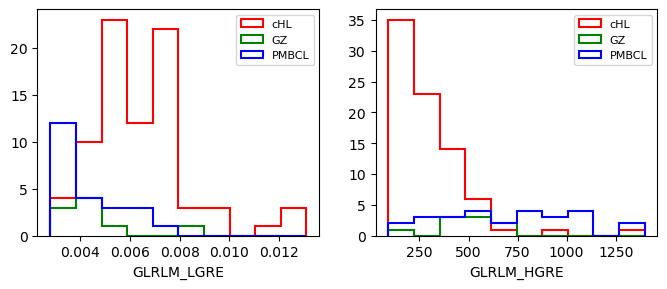

In [25]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLRLM_LGRE", "GLRLM_HGRE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLRLM_SRLGE, GLRLM_SRHGE
Short-Run Low Gray-level Emphasis or Short-Run High Gray-level Emphasis is the distribution of the short homogeneous runs with low or high grey-levels.

$GLRLM\_SRLGE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j \frac{GLRLM(i,j)}{i^2 \cdot j^2} \right )$

$GLRLM\_SRHGE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j \frac{GLRLM(i,j) \cdot i^2}{j^2} \right )$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLRLM_SRLGE` , `GLRLM_SRHGE` ]

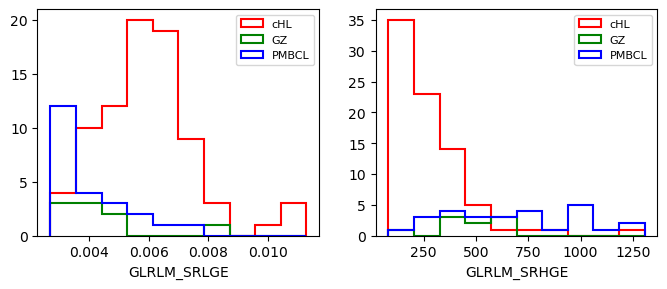

In [26]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLRLM_SRLGE", "GLRLM_SRHGE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLRLM_LRLGE, GLRLM_LRHGE
Long-Run Low Gray-level Emphasis or Long-Run High Gray-level Emphasis is the distribution of the long homogeneous runs with low or high grey-levels.

$GLRLM\_LRLGE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j \frac{GLRLM(i,j) \cdot j^2}{i^2} \right )$

$GLRLM\_LRHGE = Average~over~13~directions \left ( \frac{1}{H} \sum_i \sum_j GLRLM(i,j) \cdot i^2 \cdot j^2 \right )$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLRLM_LRLGE` , `GLRLM_LRHGE` ]

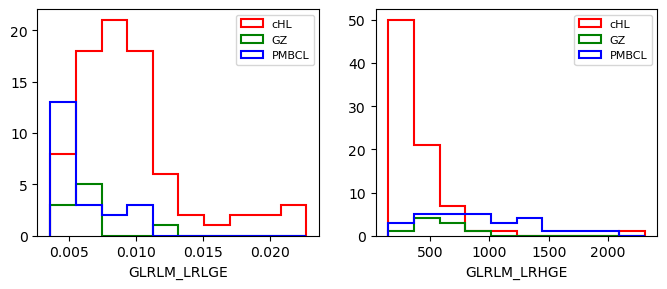

In [27]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLRLM_LRLGE", "GLRLM_LRHGE"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLRLM_GLNUr, GLRLM_RLNU
Gray-Level Non-Uniformity for run or Run Length Non-Uniformity is the non-uniformity of the grey-levels or the length of the homogeneous runs.

$GLRLM\_GLNUr = Average~over~13~directions \left ( \frac{1}{H} \sum_i \left ( \sum_j GLRLM(i,j) \right )^2 \right )$

$GLRLM\_RLNU = Average~over~13~directions \left ( \frac{1}{H} \sum_j \left ( \sum_i GLRLM(i,j) \right )^2 \right )$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Labels:** [ `GLRLM_GLNUr` , `GLRLM_RLNU` ]

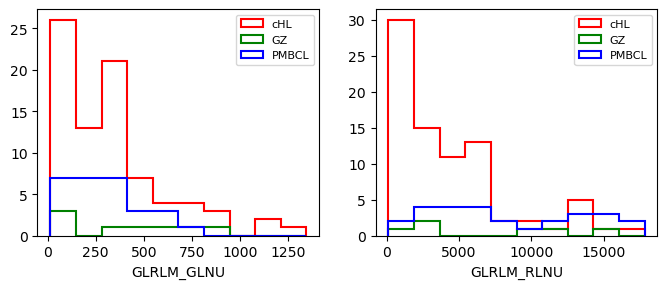

In [28]:
fig, ax = plt.subplots (nrows = 1, ncols = 2, figsize = (8,3), dpi = 100)

for i, label in enumerate (["GLRLM_GLNU", "GLRLM_RLNU"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

#### GLRLM_RP
Gray-Level Non-Uniformity for run or Run Length Non-Uniformity is the non-uniformity of the grey-levels or the length of the homogeneous runs.

$GLRLM\_RP = Average~over~13~directions \left ( \frac{H}{\sum_i \sum_j (j \cdot GLRLM(i,j))} \right )$

where $H$ corresponds to the number of homogeneous zones in the VOI.

**Label:** `GLRLM_RP`

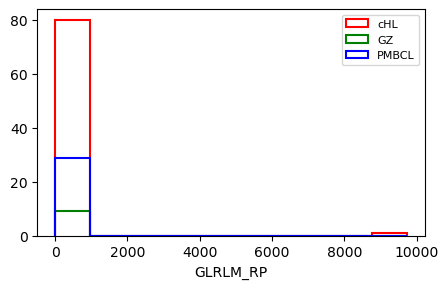

In [29]:
plt.figure (figsize = (5,3), dpi = 100)
plt.xlabel ( "GLRLM_RP", fontsize = 10 )
h_1, bins, _ = plt.hist ( data.query("lymphoma_type==1")["GLZLM_ZP"], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
h_2, bins, _ = plt.hist ( data.query("lymphoma_type==2")["GLZLM_ZP"], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
h_3, bins, _ = plt.hist ( data.query("lymphoma_type==3")["GLZLM_ZP"], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
plt.legend ( loc = "upper right", fontsize = 8 )

plt.show()

### Neighborhood Grey-Level Difference Matrix (NGLDM)

The neighborhood grey-level difference matrix (NGLDM) corresponds to the difference of grey-level between one voxel and its 26 neighbours in 3 dimensions (8 in 2D). Three texture indices can be computed from this matrix. An element $(i,1)$ of NGLDM corresponds to the probability of occurrence of level $i$ and an element $(i,2)$ is equal to:

$NGLDM(i,2) = \sum_p \sum_q \begin{cases}\left | \overline{M}(p,q) - i \right | & \text{if}~I(p,q)\\0 & \text{else}\end{cases}$

where $\overline{M}(p,q)$ is the average of intensities over the 26 neighbour voxels of voxel $(p,q)$.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/neighborhood-grey-level-different-matrix-ngldm)

#### NGLDM_Coarseness
Is the level of spatial rate of change in intensity.

$NGLDM\_Coarseness = \frac{1}{\sum_i NGLDM(i,1) \cdot NGLDM(i,2)}$

**Label:** `NGLDM_Coarseness`

#### NGLDM_Contrast
Is the intensity difference between neighbouring regions.

$NGLDM\_Contrast = \left [ \sum_i \sum_j NGLDM(i,1) \cdot NGLDM(i,2) \cdot (i - j)^2 \right ] \cdot \frac{\sum_i NGLDM(i,2)}{E \cdot G \cdot (G - 1)}$

where $E$ corresponds to the number of voxels in the VOI and $G$ the number of grey-levels.

**Label:** `NGLDM_Contrast`

#### NGLDM_Busyness
Is the spatial frequency of changes in intensity.

$NGLDM\_Busyness = \frac{\sum_i NGLDM(i,1) \cdot NGLDM(i,2)}{\sum_i \sum_j \left | i \cdot NGLDM(i,1) - j \cdot NGLDM(j,1) \right |}$

with $NGLDM(i,1) \ne 0$, $NGLDM(j,1) \ne 0$

**Label:** `NGLDM_Busyness`

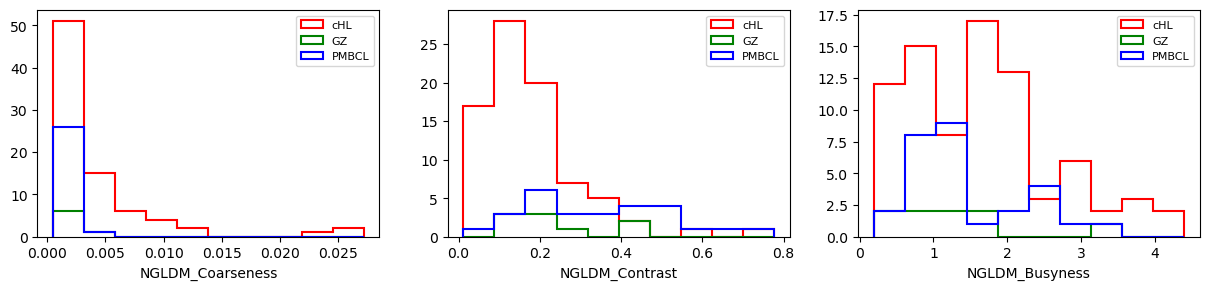

In [30]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["NGLDM_Coarseness", "NGLDM_Contrast", "NGLDM_Busyness"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  ax[i].legend ( loc = "upper right", fontsize = 8 )

plt.show()

### Grey Level Co-occurrence Matrix (GLCM)

The grey level co-occurrence matrix (GLCM) [[Haralick 2017](https://www.nature.com/articles/s41598-017-04151-4)] takes into account the arrangements of pairs of voxels to calculate textural indices. The GLCM is calculated from 13 different directions in 3D with a $\delta$-voxel distance ($\| \vec{d}\|$) relationship between neighboured voxels. The index value is the average of the index over the 13 directions in space (X, Y, Z). Six textural indices can be computed from this matrix. An entry $(i,j)$ of GLCM for one direction is equal to:

$GLCM_{\Delta x, \Delta y}(i,j) = \frac{1}{Pairs_{ROI}} \sum_{p=1}^{N - \Delta x} \sum_{q=1}^{M - \Delta y} \begin{cases} 1 & \text{if}~(I(p,q) = i, I(p+\Delta x, q + \Delta y) = j)~\text{and}~I(p,q), I(p+\Delta x, q + \Delta y) \in ROI\\ 0 & \text{otherwise} \end{cases}$

where $I(p,q)$ corresponds to voxel $(p,q)$ in an image ($I$) of size $N*M$. The vector $\vec{d}=(\Delta x, \Delta y)$ covers the 4 directions $(D_1, D_2, D_3, D_4)$, in 2D space or 13 directions $(D_1, D_2, ..., D_{13})$, in 3D space and $Pairs_{ROI}$.

**Reference:** [LIFEx docs](https://www.lifexsoft.org/index.php/resources/texture/radiomic-features/radiomic-features-calculated-in-lifex)

#### GLCM_Entropy
Is the randomness of grey-level voxel pairs.

$GLCM\_Entropy\_log_10 = Average~over~13~directions \left ( - \sum_i \sum_j GLCM(i,j) \cdot \log_{10} (GLCM(i,j) + \varepsilon) \right )$

$GLCM\_Entropy\_log_2 = Average~over~13~directions \left ( - \sum_i \sum_j GLCM(i,j) \cdot \log_{2} (GLCM(i,j) + \varepsilon) \right )$

where $\varepsilon = 2 \times 10^{-16}$.

**Labels:** [ `GLCM_Entropy_log10` , `GLCM_Entropy_log2[=JointEntropy]` ]

#### GLCM_Energy
Also called Uniformity or Second Angular Moment, is the uniformity of grey-level voxel pairs.

$GLCM\_Energy = Average~over~13~directions \left ( \sum_i \sum_j GLCM(i,j)^2 \right )$

**Label:** `GLCM_Energy[=AngularSecondMoment]`

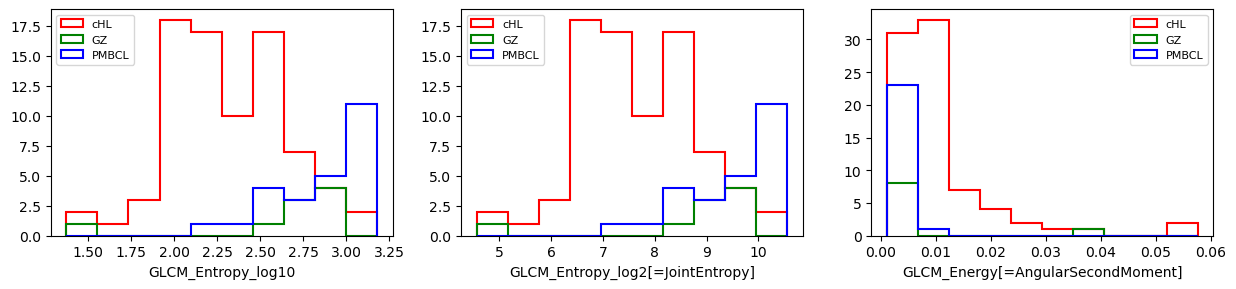

In [31]:
fig, ax = plt.subplots (nrows = 1, ncols = 3, figsize = (15,3), dpi = 100)

for i, label in enumerate (["GLCM_Entropy_log10", "GLCM_Entropy_log2[=JointEntropy]", "GLCM_Energy[=AngularSecondMoment]"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper left" if (i != 2) else "upper right"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

#### GLCM_Homogeneity
Is the homogeneity of grey-level voxel pairs.

$GLCM\_Homogeneity = Average~over~13~directions \left ( \sum_i \sum_j \frac{GLCM(i,j)}{1 + |i - j|} \right )$

**Label:** `GLCM_Homogeneity[=InverseDifference]`

#### GLCM_Contrast
Also called Variance or Inertia, is the local variations in the GLCM.

$GLCM\_Contrast = Average~over~13~directions \left ( \sum_i \sum_j (i - j)^2 \cdot GLCM(i,j) \right )$

**Label:** `GLCM_Contrast[=Variance]`

#### GLCM_Correlation
Is the linear dependency of grey-levels in GLCM.

$GLCM\_Correlation = Average~over~13~directions \left ( \sum_i \sum_j \frac{(i - \mu_i) \cdot (j - \mu_j) \cdot GLCM(i,j)}{\sigma_i \cdot \sigma_j} \right )$

where $\mu_i$ or $\mu_j$ corresponds to the average on row $i$ or column $j$ and $\sigma_i$ and $\sigma_j$ correspond to the variance on row $i$ or column $j$.

**Label:** `GLCM_Correlation`

#### GLCM_Dissimilarity
Is the variation of grey-level voxel pairs.

$GLCM\_Dissimilarity = Average~over~13~directions \left ( \sum_i \sum_j | i - j | \cdot GLCM(i,j) \right )$

**Label:** `GLCM_Dissimilarity`

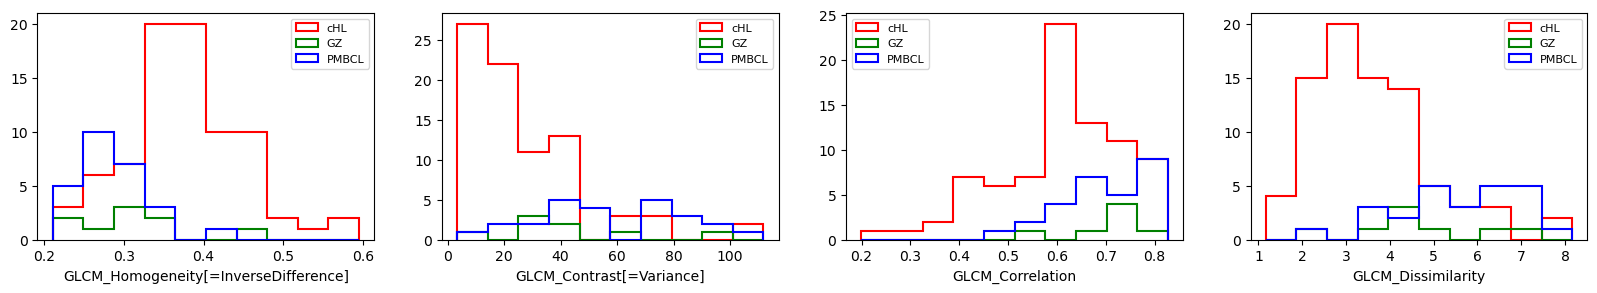

In [32]:
fig, ax = plt.subplots (nrows = 1, ncols = 4, figsize = (20,3), dpi = 100)

for i, label in enumerate (["GLCM_Homogeneity[=InverseDifference]", "GLCM_Contrast[=Variance]", "GLCM_Correlation", "GLCM_Dissimilarity"]):
  ax[i].set_xlabel ( label, fontsize = 10 )
  h_1, bins, _ = ax[i].hist ( data.query("lymphoma_type==1")[label], bins = 10  , histtype = "step", lw = 1.5, color = "r", label = "cHL"   )
  h_2, bins, _ = ax[i].hist ( data.query("lymphoma_type==2")[label], bins = bins, histtype = "step", lw = 1.5, color = "g", label = "GZ"    )
  h_3, bins, _ = ax[i].hist ( data.query("lymphoma_type==3")[label], bins = bins, histtype = "step", lw = 1.5, color = "b", label = "PMBCL" )
  loc = "upper right" if (i != 2) else "upper left"
  ax[i].legend ( loc = loc, fontsize = 8 )

plt.show()

### Final remarks

**Note:** In PET images, by default, texture matrices are computed after a resampling step with 64 discrete values, between 0 and 20 SUV units, without spatial resampling [[Orlhac 2015](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0145063)]. Six texture indices have been shown to be robust to segmentation and are relatively independent one from another:
- GLCM_Homogeneity (from GLCM);
- GLCM_Entropy (from GLCM);
- GLRLM_Short-Run Emphasis (GLRLM_SRE, from GLRLM);
- GLRLM_Long-Run Emphasis (GLRLM_LRE, from GLRLM);
- GLZLM_Low Gray-level Zone Emphasis (GLZLM_LGZE, from GLZLM);
- GLZLM_High Gray-level Zone Emphasis (GLZLM_HGZE, from GLZLM).

**Reference:** [LIFEx UserGuide](https://www.lifexsoft.org/images/phocagallery/documentation/ProtocolTexture/UserGuide/TextureUserGuide.pdf)

In [33]:
feats_to_drop = [
  "PARAMS_DistanceOfNeighbours", "PARAMS_NumberOfGreyLevels", "PARAMS_BinSize", "PARAMS_ZSpatialResampling", 
  "PARAMS_YSpatialResampling", "PARAMS_XSpatialResampling", "GLCM_Energy[=AngularSecondMoment]", 
  "GLCM_Contrast[=Variance]", "GLCM_Correlation", "GLCM_Entropy_log2[=JointEntropy]", "GLCM_Dissimilarity", 
  "GLRLM_LGRE", "GLRLM_HGRE", "GLRLM_SRLGE", "GLRLM_SRHGE", "GLRLM_LRLGE", "GLRLM_LRHGE", "GLRLM_GLNU", 
  "GLRLM_RLNU", "GLRLM_RP", "NGLDM_Coarseness", "NGLDM_Contrast", "NGLDM_Busyness", "GLZLM_SZE",
  "GLZLM_LZE", "GLZLM_SZLGE", "GLZLM_SZHGE", "GLZLM_LZLGE", "GLZLM_LZHGE", "GLZLM_GLNU", "GLZLM_ZLNU", 
  "GLZLM_ZP", "TimePosition", "zLocation[onlyFor2DROI]"
]

redu_data . drop ( labels = feats_to_drop, axis = 1, inplace = True )

## Data export

In [34]:
exp_data_file = "db_mediastinalbulky_pruned.pkl"
exp_file_path = os.path.join ( data_dir, exp_data_file )

redu_data . to_pickle ( exp_file_path )